## Анализ данных 

**Импорт библиотек:**

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV

In [60]:
data = pd.read_csv('data/data.csv', index_col='id')

In [72]:
data.head()

,relation,personal_political,personal_religion_id,personal_people_main,personal_life_main,personal_smoking,personal_alcohol,universities_id,sex
id,,,,,,,,,
42460480,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4629.0,1
8882147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
55348747,1.0,3.0,NaN,NaN,NaN,NaN,NaN,35837.0,1
26921686,2.0,NaN,102.0,NaN,NaN,NaN,NaN,364.0,1
38970318,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [100]:
data.groupby('universities_id')['sex'].count().sort_values(ascending = False)

universities_id
2.0         1692
1.0          840
477.0        304
56.0         275
1096.0       274
            ... 
225584.0       1
226203.0       1
226328.0       1
226572.0       1
98293.0        1
Name: sex, Length: 7523, dtype: int64

In [101]:
data = data.drop('universities_id', axis=1)

In [102]:
data.head()

,relation,personal_political,personal_religion_id,personal_people_main,personal_life_main,personal_smoking,personal_alcohol,sex
id,,,,,,,,
42460480,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1
8882147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
55348747,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1
26921686,2.0,NaN,102.0,NaN,NaN,NaN,NaN,1
38970318,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1


**Удаляем выбросы:**

In [130]:
data = data.drop(data[data['relation'] < 0].index)
data = data.drop(data[data['relation'] > 8].index)
data = data.drop(data[data['personal_political'] > 9].index)
data = data.drop(data[data['personal_religion_id'] == 1].index)

**Зависимость признаков от пола:**

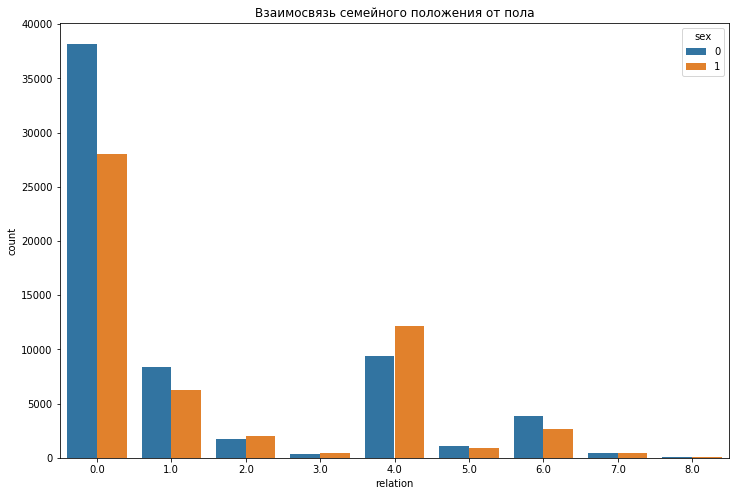

In [126]:
plt.figure(figsize=(12, 8))
sns.countplot(x='relation', hue='sex', data=data);
plt.title('Взаимосвязь семейного положения от пола');

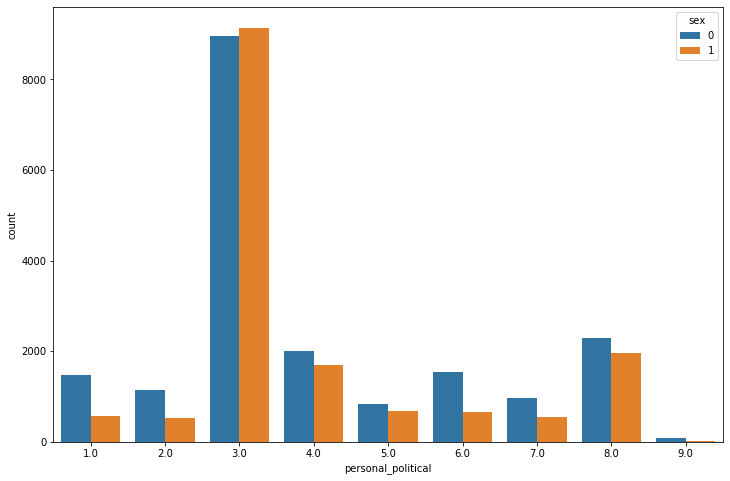

In [128]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_political', hue='sex', data=data);

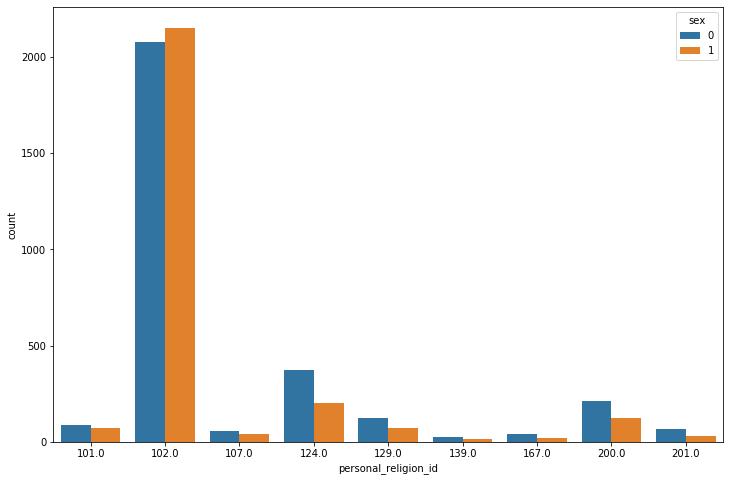

In [131]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_religion_id', hue='sex', data=data);

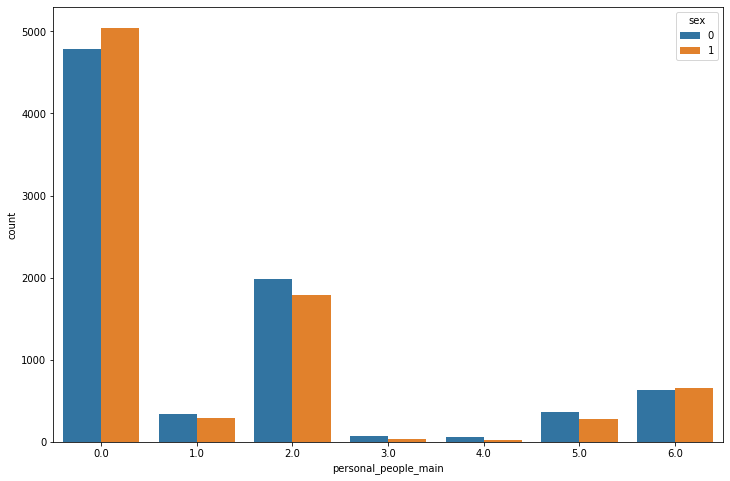

In [81]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_people_main', hue='sex', data=data);

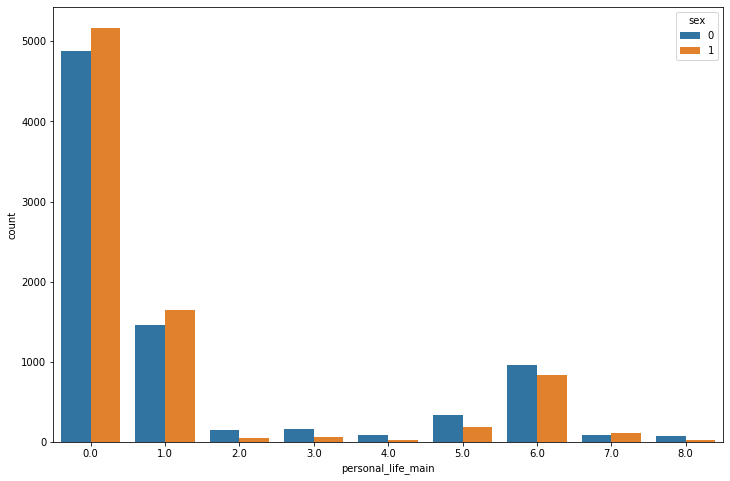

In [82]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_life_main', hue='sex', data=data);

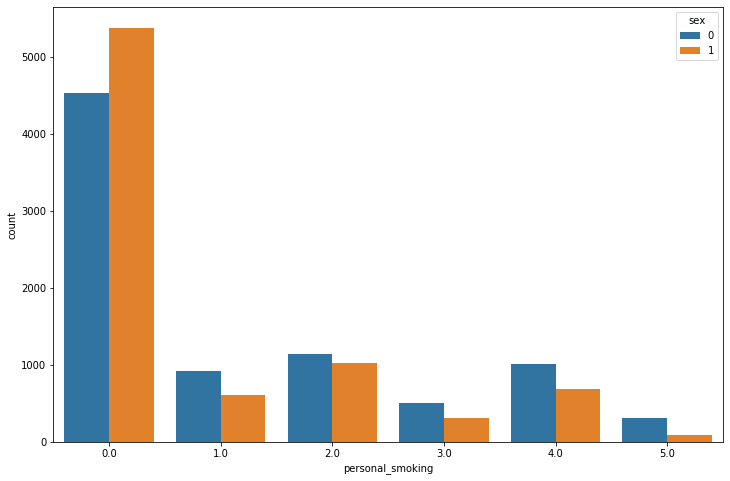

In [83]:
plt.figure(figsize=(12, 8))
sns.countplot(x='personal_smoking', hue='sex', data=data);

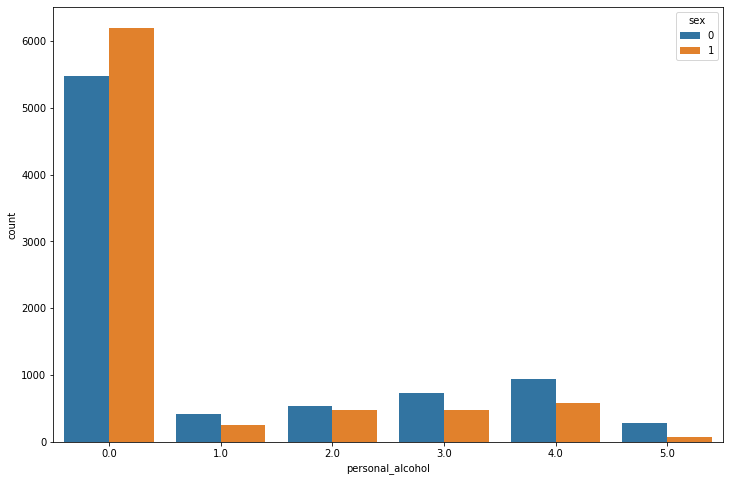

In [84]:
plt.figure(figsize = (12, 8))
sns.countplot(x='personal_alcohol', hue='sex', data=data);

**Унитарное кодирование признаков - `One Hot Encoding`:**

In [132]:
data.head()

,relation,personal_political,personal_religion_id,personal_people_main,personal_life_main,personal_smoking,personal_alcohol,sex
id,,,,,,,,
42460480,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1
8882147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
55348747,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1
26921686,2.0,NaN,102.0,NaN,NaN,NaN,NaN,1
38970318,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1


In [133]:
data = pd.get_dummies(data, columns=['relation',
                      'personal_political',
                      'personal_religion_id', 
                      'personal_people_main', 
                      'personal_life_main',
                      'personal_smoking', 
                      'personal_alcohol'])

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220112 entries, 42460480 to 52653967
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   sex                         220112 non-null  int64
 1   relation_0.0                220112 non-null  uint8
 2   relation_1.0                220112 non-null  uint8
 3   relation_2.0                220112 non-null  uint8
 4   relation_3.0                220112 non-null  uint8
 5   relation_4.0                220112 non-null  uint8
 6   relation_5.0                220112 non-null  uint8
 7   relation_6.0                220112 non-null  uint8
 8   relation_7.0                220112 non-null  uint8
 9   relation_8.0                220112 non-null  uint8
 10  personal_political_1.0      220112 non-null  uint8
 11  personal_political_2.0      220112 non-null  uint8
 12  personal_political_3.0      220112 non-null  uint8
 13  personal_political_4.0      220112 

**Деление выборки на объекты - `X` и метки - `y`:**

In [136]:
X = data.drop('sex', axis=1)
y = data['sex']

**Разбиение выборки на `Train set` и `Test set`:**

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

**Задаем модель:**

In [187]:
%%time

log_reg = LogisticRegression(C=0.1, random_state=17, n_jobs=-1)

log_reg.fit(X_train, y_train)

Wall time: 15.5 s


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=17,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [198]:
%%time
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=17)
lasso_cv.fit(X, y)

Wall time: 4.62 s


LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [199]:
lasso_cv.alpha_

10.0

In [174]:
def best_coef(coefs, features=X.columns):
    return pd.DataFrame(coefs, index=features, columns=['coef']).sort_values('coef', ascending=False)

In [189]:
best_coef(log_reg.coef_[0])

,coef
personal_life_main_7.0,0.574667
personal_life_main_1.0,0.397370
personal_people_main_6.0,0.387097
personal_life_main_6.0,0.307671
personal_people_main_1.0,0.274404
personal_religion_id_102.0,0.209412
personal_smoking_0.0,0.204698
personal_people_main_4.0,0.203277
relation_3.0,0.183694
personal_religion_id_101.0,0.158592


In [188]:
accuracy_score(log_reg.predict(X_test), y_test)

0.5646333706878275